In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from corr.katcp_wrapper import FpgaClient

In [3]:
r2 = FpgaClient('r2kid')

In [41]:
r2.listbof()

['test1gberx_2015_Jul_26_1429.bof',
 'basic_interrupt_2012_Jul_26_1450.bof',
 'qdr_fpga_read_test_2015_Oct_01_1312.bof',
 'qdr_dac_test_2015_Oct_01_1630.bof',
 'qdr_fpga_read_test_2015_Oct_01_1420.bof',
 'test1gberx_2015_Jul_25_1726.bof',
 'r2test_2015_Jul_23_0846.bof',
 'r2dac_2015_Jul_24_1439.bof',
 'test1gbetx_2015_Jul_26_1948.bof',
 'qdr_dac_test_2015_Oct_02_1524.bof',
 'test1gbetx_2015_Jul_26_1556.bof',
 'test1gberx_2015_Jul_25_1739.bof',
 'test1gbetx_2015_Jul_26_1729.bof',
 'r2dac_2015_Jul_24_1302.bof',
 'test1gberx_2015_Jul_26_1458.bof',
 'qdr_tst_r2_2x_2012_May_07_1216.bof',
 'basic_interrupt_2012_Jun_28_1232.bof',
 'test1leds_2015_Sep_17_1059.bof',
 'test1gberx_2015_Jul_25_1613.bof',
 'qdr_fpga_read_test_2015_Oct_01_1545.bof',
 'basic_interrupt_2012_Jul_26_1528.bof',
 'test1gberx_2015_Jul_26_1444.bof',
 'test1gbetx_2015_Jul_26_1656.bof',
 'digicom_r2_2500MHz.bof',
 'test1gbetx_2015_Jul_26_2114.bof',
 'r2b2xpfb14mcr17b_2015_Jul_25_1237.bof',
 'test1gberx_2015_Jul_26_1359.bof',


In [42]:
r2.progdev( 'qdr_dac_test_2015_Oct_02_1524.bof')

'ok'

In [43]:
r2.listdev()

['adcsnap_bram',
 'adcsnap_ctrl',
 'adcsnap_status',
 'bank',
 'dacctrl',
 'mask',
 'qdr0_ctrl',
 'qdr0_memory',
 'qdr_en',
 'snapshot_bram',
 'snapshot_ctrl',
 'snapshot_status',
 'status',
 'sys_board_id',
 'sys_clkcounter',
 'sys_rev',
 'sys_rev_rcs',
 'sys_scratchpad']

In [44]:
r2.est_brd_clk()

256.75728

In [62]:
r2.read_int('status')

6

In [8]:
import sys

In [9]:
sys.path.append('/home/readout/mlib_devel_soak/xps_sw_support/qdr/roach2')

In [10]:
import qdr

In [11]:
q = qdr.Qdr(r2,'qdr0')

In [115]:
q.qdr_cal(verbosity=1)

--- === Trying with OUT DELAYS to 31 === ---
Eye for QDR qdr0 (0 is pass, 1 is fail):
	Tap step  0:  11111111111111111111111111111111
	Tap step  1:  11111111111111111111111111111111
	Tap step  2:  11111111111111111111111111111111
	Tap step  3:  11111111111111111111111111111111
	Tap step  4:  11111111111111111111111111111111
	Tap step  5:  11111111111111111111111111111111
	Tap step  6:  11111111111111111111111111111111
	Tap step  7:  11111111111111111111111111111111
	Tap step  8:  11111111111111111111111111111111
	Tap step  9:  11111111111111111111111111111111
	Tap step 10:  11111111111111111111111111111111
	Tap step 11:  11111111111111111111111111111111
	Tap step 12:  11111111111111111111111111111111
	Tap step 13:  11111111111111111111111111111111
	Tap step 14:  11111111111111111111111111111111
	Tap step 15:  11111111111111111111110111111111
	Tap step 16:  11111111111111110110000111010001
	Tap step 17:  11111111111111000000000101000000
	Tap step 18:  11111011111111000000000001000000
	T

True

In [20]:
q.clock_speed

In [22]:
q.qdr_cal_check??

In [23]:
q.memory

'qdr0_memory'

In [145]:
ns = 2**16
fwave = np.sin(np.arange(ns)*8892*np.pi/(1.0*ns))
#fwave = np.linspace(-.5,.5,ns)
qwave = np.round(fwave*(2**15-100)).astype('>i2')

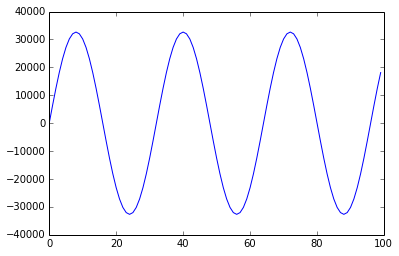

In [170]:
plot(qwave[:100])

In [146]:
mem = np.zeros((ns*2,),dtype='>i2')
mem[2::4] = qwave[0::2]
mem[3::4] = qwave[1::2]

In [147]:
r2.blindwrite(q.memory,mem.tostring())

In [144]:
r2.write_int('mask',2**15-1)

In [137]:
r2.write_int('qdr_en',3)

In [163]:
d = np.fromstring(r2.snapshot_get('snapshot',man_trig=True)['data'],dtype='>i2')

In [164]:
d

array([-12502, -18149,      0, ...,  -6373,      0,      0], dtype=int16)

In [172]:
for nn in d[:20]:
    print '%08x' % nn

-00030d6
-00046e5
00000000
00000000
-0005a3c
-0006a1a
00000000
00000000
-00075e5
-0007d28
00000000
00000000
-0007f9c
-0007d28
00000000
00000000
-00075e5
-0006a1a
00000000
00000000


In [166]:
r2.write_int('dacctrl',1)

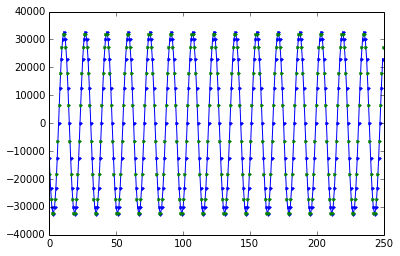

In [167]:
plot(d[:1000:4],'.-')
plot(d[1:1000:4],'.')
#ylim(0,10)

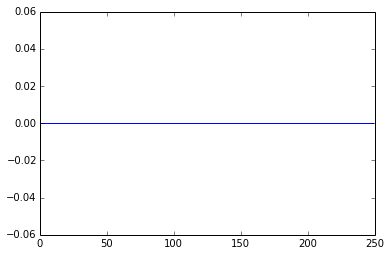

In [174]:
plot(d[3:1000:4])

In [154]:
adc = np.fromstring(r2.snapshot_get('adcsnap')['data'],dtype='>i2').astype('float')
x = np.zeros((adc.shape[0]/2,))
x[::2] = adc[::4]
x[1::2] = adc[1::4]

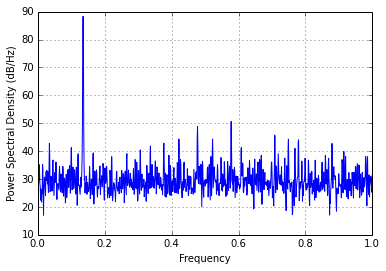

In [162]:
blah = psd(x,NFFT=2048)

In [159]:
x.shape

(8192,)

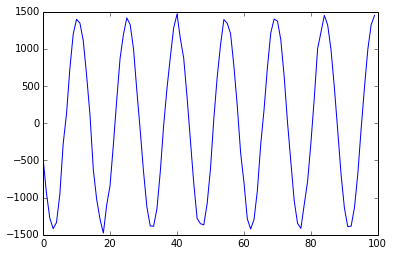

In [156]:
plot(x[:100])

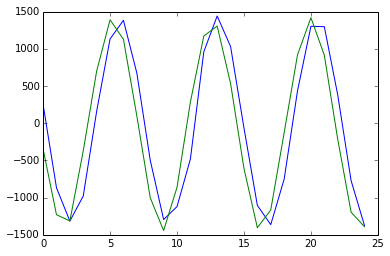

In [153]:
plot(adc[:100:4])
plot(adc[1:100:4])


In [107]:
import valon_synth

In [108]:
v = valon_synth.Synthesizer('/dev/ttyUSB0')

In [114]:
v.get_frequencies()

(440.0, 440.0)

In [113]:
v.set_frequency_a(440.0,chan_spacing=2.0)
v.set_frequency_b(440.0,chan_spacing=2.0)

True

In [111]:
v.get_phase_locks()

(True, True)